## Building a CNN Image Classifier

In [63]:
from keras.datasets import mnist
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten  
from matplotlib import pyplot
from keras.utils import np_utils
from yellowbrick.classifier import ConfusionMatrix

In [2]:
## pip install keras

Note: you may need to restart the kernel to use updated packages.


In [8]:
##pip install tensorflow

  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=82063e8f4a08aeb82888e9dd1e89df875fa158a36d5ab3e7e18f60b465ac9292
  Stored in directory: c:\users\qvant\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

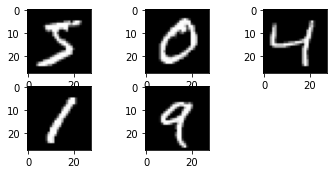

In [36]:
for i in range(5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [24]:
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainy.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testy.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [39]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [42]:
X_train /= 255
X_test /= 255

In [45]:
##pip install np_utils

  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=a417c7a82fc09e9b27d4859381f655061cb0cb588b660b1382d0db19a8e0de0d
  Stored in directory: c:\users\qvant\appdata\local\pip\cache\wheels\65\07\4b\1c96f437e1bec60b3d2acd0b81d0a7969505f5251efbb5a060
Successfully built np-utils
Note: you may need to restart the kernel to use updated packages.


In [51]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print(y_test.shape)

(10000,)


In [58]:
model = Sequential()

In [59]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1)

1875/1875 [==============================] - 36s 19ms/step - loss: 0.2038 - accuracy: 0.9369


In [ ]:
cm = ConfusionMatrix(model, encoder = label_encoder,  percent=False)

In [ ]:
# Fitting the model to confusion matrix
cm.fit(X_test, Y_test)
mod_acc = 100*cm.score(X_test, Y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

for label in cm.ax.texts:
    label.set_size(25)

cm.show()

The model accuracy after running the fit is .9369. 